In [2]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA


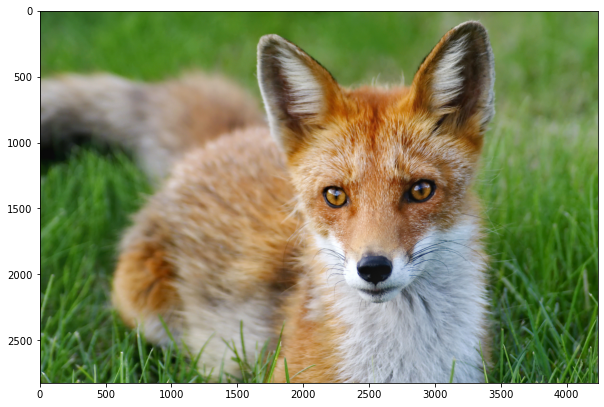

In [3]:
img = imread("fox1.jpg")
plt.figure(figsize=[10,8]) #changing the figure size just for a bigger display of image
plt.imshow(img)

In [4]:
print(img.shape) # the shape give us height, width , color in this case we have 2824, 4236, 3(3 channels :rgb)

(2824, 4236, 3)


**Converting the image to greyscale**

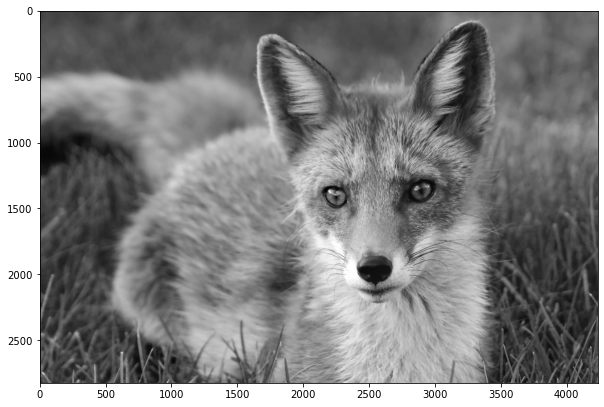

In [5]:
img_sum = img.sum(axis = 2)
gray = img_sum/img_sum.max()
plt.figure(figsize=[10,8])
plt.imshow(gray)
plt.imshow(gray, cmap=plt.cm.gray)


**PCA**

In [6]:
pca = PCA()
pca.fit(gray)

# Getting the cumulative variance

cumulative_var = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(cumulative_var>95)
print("Number of components explaining 95% variance: "+ str(k))

Number of components explaining 95% variance: 41


In [11]:
# How many PCs explain 95% of the variance?
k = np.argmax(cumulative_var>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")


Number of components explaining 95% variance: 41


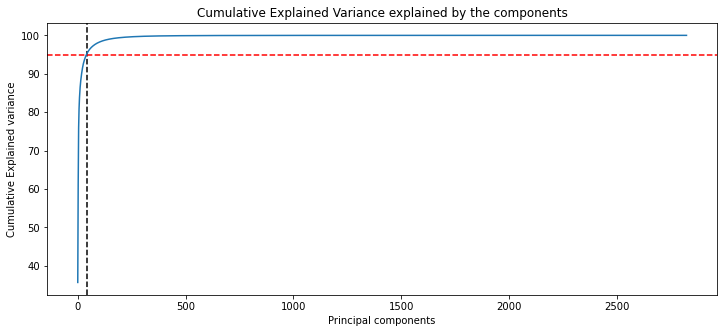

In [15]:
plt.figure(figsize=[12,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(cumulative_var)


**We notice that only 41 components can explain 95% of informations**

# **Reconstructing the image using only 41 components and see the difference in visualization**

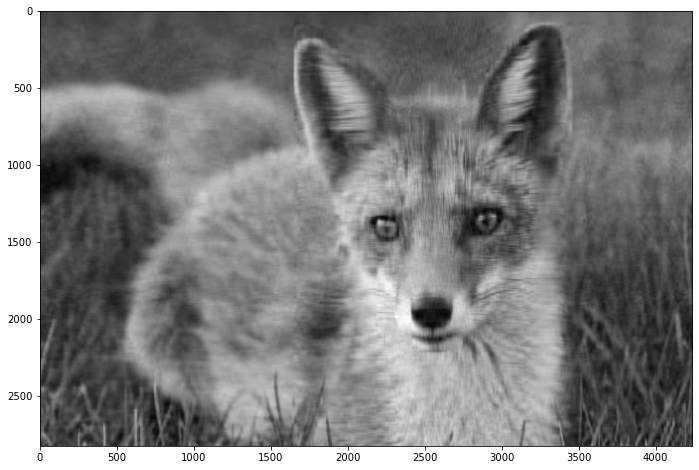

In [19]:
#fit_transform is a method that find the 41 PCs and transform and represent the data in those 41 new components/columns.
incremnetalPCA = IncrementalPCA(n_components=k)
image_recon = incremnetalPCA.inverse_transform(incremnetalPCA.fit_transform(gray))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

**We noticy that the image with 95% variance explained have some details but miss the CLARITY.**

**Changing number of components will solve it**

# Reconstructing with different number of components

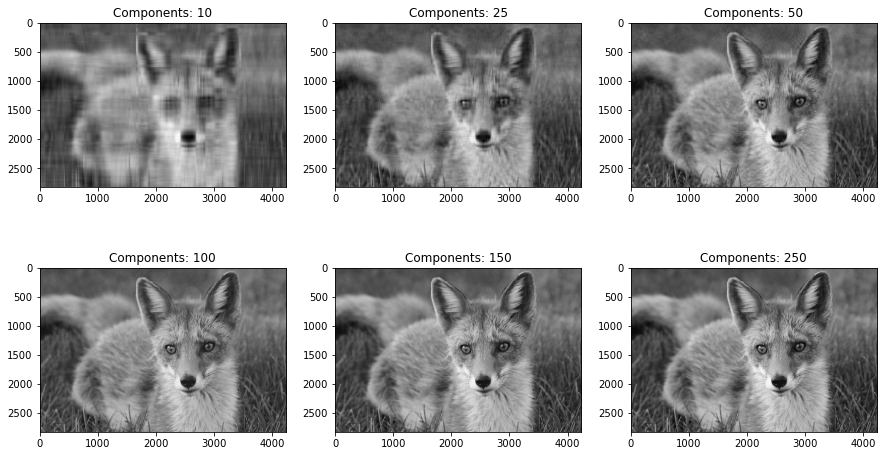

In [20]:
nb_component = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    ipca = IncrementalPCA(n_components = nb_component[i])
    image_recon = ipca.inverse_transform(ipca.fit_transform(gray))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    plt.title("Components: "+str(nb_component[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

**As you see we have a clear details with 150 components which give us a compressed image similar to the original with only 150 components instead of 3000**